In [1]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import pandas as pd 
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt 
from wordcloud import wordcloud 
from nltk.tokenize import word_tokenize
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re 
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests 
from bs4 import BeautifulSoup as bs 
from selenium import webdriver

In [3]:
iphone12_reviews=[]

# Extracting reviews from amazone for product Apple iphone 12

In [4]:
for i in range (1,12):
    op=[]
    url="https://www.amazon.in/product-reviews/B08L5VJWCV/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone12_reviews = iphone12_reviews+op 

In [5]:
iphone12_reviews

['\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\n  \xa0Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient  as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple 

In [6]:
iphone12_reviews1=[Text.strip() for Text in iphone12_reviews]
iphone12_reviews1=[Text for Text in iphone12_reviews]
iphone12_reviews1[0:10]

['\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\n  \xa0Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient  as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple 

In [7]:
text=' '.join(iphone12_reviews1)
text 

"\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\n  \xa0Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient  as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple a

In [8]:
import string
no_punc_text=text.translate(str.maketrans(' ',' ',string.punctuation))
no_punc_text

'\n\n\n\n\n                    The media could not be loaded\n                \n\n\n\n\n  \xa0Another beauty from Apple I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth Thanks to all new A14 Bionic chipBuild quality was great as always from ApplePhone feels light on hands due to aluminium body I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel perfect Phone comes with iOS 141 Camera quality was excellent and sufficient  as a normal userIf you are from iOS ecosystem nothing will go wrong hereThere is nothing to question about the quality and interface from Apple  it’s my personal opinion as a long time apple userAs you all know iPhone 12 won’t comes with earphones and charging brick adapterI bought separately 20w apple adapter from new

In [9]:
no_punc_text=no_punc_text.lower()
no_punc_text

'\n\n\n\n\n                    the media could not be loaded\n                \n\n\n\n\n  \xa0another beauty from apple i was upgraded from iphone x and it was great experience with all the latest specs and flawlessly smooth thanks to all new a14 bionic chipbuild quality was great as always from applephone feels light on hands due to aluminium body i chose blue colour because wanted to go for different colour than routine black and white iphones so initially i was bit skeptical but after seeing the phone in person i’m happy with the blue colour  “ not bad at all and not too flashy”grip and feel perfect phone comes with ios 141 camera quality was excellent and sufficient  as a normal userif you are from ios ecosystem nothing will go wrong herethere is nothing to question about the quality and interface from apple  it’s my personal opinion as a long time apple useras you all know iphone 12 won’t comes with earphones and charging brick adapteri bought separately 20w apple adapter from new

In [10]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:20])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!

['the', 'media', 'could', 'not', 'be', 'loaded', 'another', 'beauty', 'from', 'apple', 'i', 'was', 'upgraded', 'from', 'iphone', 'x', 'and', 'it', 'was', 'great']


In [11]:
len(text_tokens)

16864

In [12]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:60])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['media', 'could', 'loaded', 'another', 'beauty', 'apple', 'upgraded', 'iphone', 'x', 'great', 'experience', 'latest', 'specs', 'flawlessly', 'smooth', 'thanks', 'new', 'a14', 'bionic', 'chipbuild', 'quality', 'great', 'always', 'applephone', 'feels', 'light', 'hands', 'due', 'aluminium', 'body', 'chose', 'blue', 'colour', 'wanted', 'go', 'different', 'colour', 'routine', 'black', 'white', 'iphones', 'initially', 'bit', 'skeptical', 'seeing', 'phone', 'person', '’', 'happy', 'blue', 'colour', '“', 'bad', 'flashy', '”', 'grip', 'feel', 'perfect', 'phone', 'comes']


In [13]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:70])

['media', 'could', 'loaded', 'another', 'beauty', 'apple', 'upgraded', 'iphone', 'x', 'great', 'experience', 'latest', 'specs', 'flawlessly', 'smooth', 'thanks', 'new', 'a14', 'bionic', 'chipbuild', 'quality', 'great', 'always', 'applephone', 'feels', 'light', 'hands', 'due', 'aluminium', 'body', 'chose', 'blue', 'colour', 'wanted', 'go', 'different', 'colour', 'routine', 'black', 'white', 'iphones', 'initially', 'bit', 'skeptical', 'seeing', 'phone', 'person', '’', 'happy', 'blue', 'colour', '“', 'bad', 'flashy', '”', 'grip', 'feel', 'perfect', 'phone', 'comes', 'ios', '141', 'camera', 'quality', 'excellent', 'sufficient', 'normal', 'userif', 'ios', 'ecosystem']


In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:55])

['media', 'could', 'load', 'anoth', 'beauti', 'appl', 'upgrad', 'iphon', 'x', 'great', 'experi', 'latest', 'spec', 'flawlessli', 'smooth', 'thank', 'new', 'a14', 'bionic', 'chipbuild', 'qualiti', 'great', 'alway', 'applephon', 'feel', 'light', 'hand', 'due', 'aluminium', 'bodi', 'chose', 'blue', 'colour', 'want', 'go', 'differ', 'colour', 'routin', 'black', 'white', 'iphon', 'initi', 'bit', 'skeptic', 'see', 'phone', 'person', '’', 'happi', 'blue', 'colour', '“', 'bad', 'flashi', '”']


In [15]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [16]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:73])

media could loaded another beauty apple upgraded iphone x great experience latest specs flawlessly smooth thanks new a14 bionic chipbuild quality great always applephone feels light hands due aluminium body chose blue colour wanted go different colour routine black white iphones initially bit skeptical seeing phone person ’ happy blue colour “ bad flashy ” grip feel perfect phone comes ios 141 camera quality excellent sufficient normal userif ios ecosystem nothing go wrong


In [17]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:77])

['medium', 'could', 'load', 'another', 'beauty', 'apple', 'upgrade', 'iphone', 'x', 'great', 'experience', 'late', 'spec', 'flawlessly', 'smooth', 'thank', 'new', 'a14', 'bionic', 'chipbuild', 'quality', 'great', 'always', 'applephone', 'feel', 'light', 'hand', 'due', 'aluminium', 'body', 'choose', 'blue', 'colour', 'want', 'go', 'different', 'colour', 'routine', 'black', 'white', 'iphone', 'initially', 'bite', 'skeptical', 'see', 'phone', 'person', "'", 'happy', 'blue', 'colour', '"', 'bad', 'flashy', '"', 'grip', 'feel', 'perfect', 'phone', 'come', 'io', '141', 'camera', 'quality', 'excellent', 'sufficient', 'normal', 'userif', 'io', 'ecosystem', 'nothing', 'go', 'wrong', 'herethere', 'nothing', 'question', 'quality']


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'medium': 343, 'could': 147, 'load': 321, 'another': 64, 'beauty': 87, 'apple': 69, 'upgrade': 551, 'iphone': 286, 'great': 239, 'experience': 207, 'late': 301, 'spec': 496, 'flawlessly': 222, 'smooth': 487, 'thank': 519, 'new': 363, 'a14': 43, 'bionic': 90, 'chipbuild': 125, 'quality': 437, 'always': 58, 'applephone': 70, 'feel': 216, 'light': 313, 'hand': 243, 'due': 179, 'aluminium': 57, 'body': 96, 'choose': 126, 'blue': 95, 'colour': 130, 'want': 569, 'go': 237, 'different': 170, 'routine': 460, 'black': 93, 'white': 580, 'initially': 277, 'bite': 92, 'skeptical': 482, 'see': 471, 'phone': 405, 'person': 403, 'happy': 246, 'bad': 81, 'flashy': 221, 'grip': 240, 'perfect': 399, 'come': 131, 'io': 284, '141': 17, 'camera': 110, 'excellent': 202, 'sufficient': 505, 'normal': 367, 'userif': 560, 'ecosystem': 186, 'nothing': 371, 'wrong': 590, 'herethere': 256, 'question': 439, 'interface': 283, 'personal': 404, 'opinion': 387, 'long': 323, 'time': 531, 'usera': 559, 'know': 296, '12'

In [19]:
print(vectorizer.get_feature_names()[40:250])
print(x.toarray()[40:250])

['895', '90hz', '9pro', 'a14', 'a15', 'able', 'absolutely', 'accessory', 'accurate', 'across', 'adapter', 'adapteri', 'adobe', 'advertising', 'all2batterybattery', 'already', 'also', 'aluminium', 'always', 'amazing', 'amazon', 'android', 'animation', 'announce', 'another', 'anyway', 'apart', 'app', 'appario', 'apple', 'applephone', 'application', 'approxafter', 'around', 'article', 'attract', 'aug2021', 'away', 'awesome', 'back', 'backup', 'bad', 'badly', 'battery', 'batteryconsnothe', 'batteryi', 'beat', 'beauty', 'believe', 'big', 'bionic', 'bit', 'bite', 'black', 'blog', 'blue', 'body', 'box', 'box3notifications', 'boxy', 'boy', 'brick', 'brother', 'browse', 'build', 'business', 'buttery', 'buy', 'call', 'cam', 'camera', 'camerathe', 'can', 'capable', 'care', 'cash', 'cdon', 'change', 'change3', 'charge', 'charger', 'chat', 'check', 'chip', 'chipand', 'chipbuild', 'choose', 'classic', 'color', 'colorsphone', 'colour', 'come', 'comfortable', 'comfotable', 'compare', 'competition', 'c

In [20]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_metrix_ngram = vectorizer_ngram_range.fit_transform(iphone12_reviews1)
print(vectorizer_ngram_range.get_feature_names())

['11', '12', '13', 'about', 'after', 'all', 'am', 'an', 'an android', 'and', 'android', 'apple', 'are', 'around', 'as', 'battery', 'battery life', 'be', 'better', 'but', 'camera', 'can', 'charging', 'comes', 'day', 'display', 'don', 'even', 'flagship', 'for', 'for the', 'from', 'get', 'go', 'good', 'great', 'has', 'have', 'here', 'if', 'if you', 'in', 'in the', 'india', 'ios', 'iphone', 'iphone 12', 'is', 'it', 'its', 'life', 'll', 'lot', 'lot of', 'more', 'my', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'or', 'out', 'phone', 'phones', 'price', 'quality', 'really', 'screen', 'smooth', 'so', 'still', 'than', 'that', 'the', 'the battery', 'the iphone', 'the phone', 'then', 'there', 'they', 'this', 'time', 'to', 'too', 'updates', 'use', 'very', 'wait', 'was', 'way', 'when', 'will', 'with', 'with the', 'yes', 'you', 'your']


In [21]:
print(bow_metrix_ngram.toarray())

[[ 0  4  0 ...  0  5  1]
 [ 0  0  0 ...  0  0  0]
 [ 2  1  0 ...  0  2  0]
 ...
 [ 0  7  6 ...  1 12  4]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]]


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_grams_max_features=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(1,3),max_features=1000)
tf_idf_matrix_n_grams_max_features=vectorizer_n_grams_max_features.fit_transform(iphone12_reviews1)
print(vectorizer_n_grams_max_features.get_feature_names())

['00', '10', '11', '11 and', '12', '12 is', '128gb', '13', '14', '2020', '2022', '4g', '64gb', 'a14', 'a14 bionic', 'a14 bionic chip', 'able', 'able to', 'about', 'about the', 'accessories', 'adapter', 'after', 'after month', 'after using', 'all', 'all the', 'also', 'always', 'am', 'amazing', 'amazon', 'an', 'an android', 'an android flagship', 'and', 'and the', 'android', 'android flagship', 'another', 'any', 'apart', 'appario', 'appario retail', 'appario retail pvt', 'apple', 'apple has', 'apple india', 'apple india online', 'apps', 'apps are', 'are', 'are no', 'are really', 'around', 'as', 'as always', 'as well', 'at', 'at least', 'back', 'bad', 'battery', 'battery is', 'battery life', 'battery yes', 'be', 'be out', 'because', 'because of', 'been', 'before', 'believe', 'best', 'better', 'between', 'between iphone', 'between iphone 11', 'bionic', 'bionic chip', 'bit', 'blue', 'blue colour', 'body', 'bought', 'box', 'boy', 'brick', 'build', 'build quality', 'but', 'but it', 'but this'

In [23]:
print(tf_idf_matrix_n_grams_max_features.toarray())

[[0.         0.         0.         ... 0.         0.0344038  0.        ]
 [0.         0.06532087 0.         ... 0.         0.         0.        ]
 [0.         0.         0.09456972 ... 0.         0.         0.        ]
 ...
 [0.         0.01794025 0.         ... 0.06044338 0.09684009 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(65,75))
    plt.imshow(wordcloud)
    plt.axis("off")

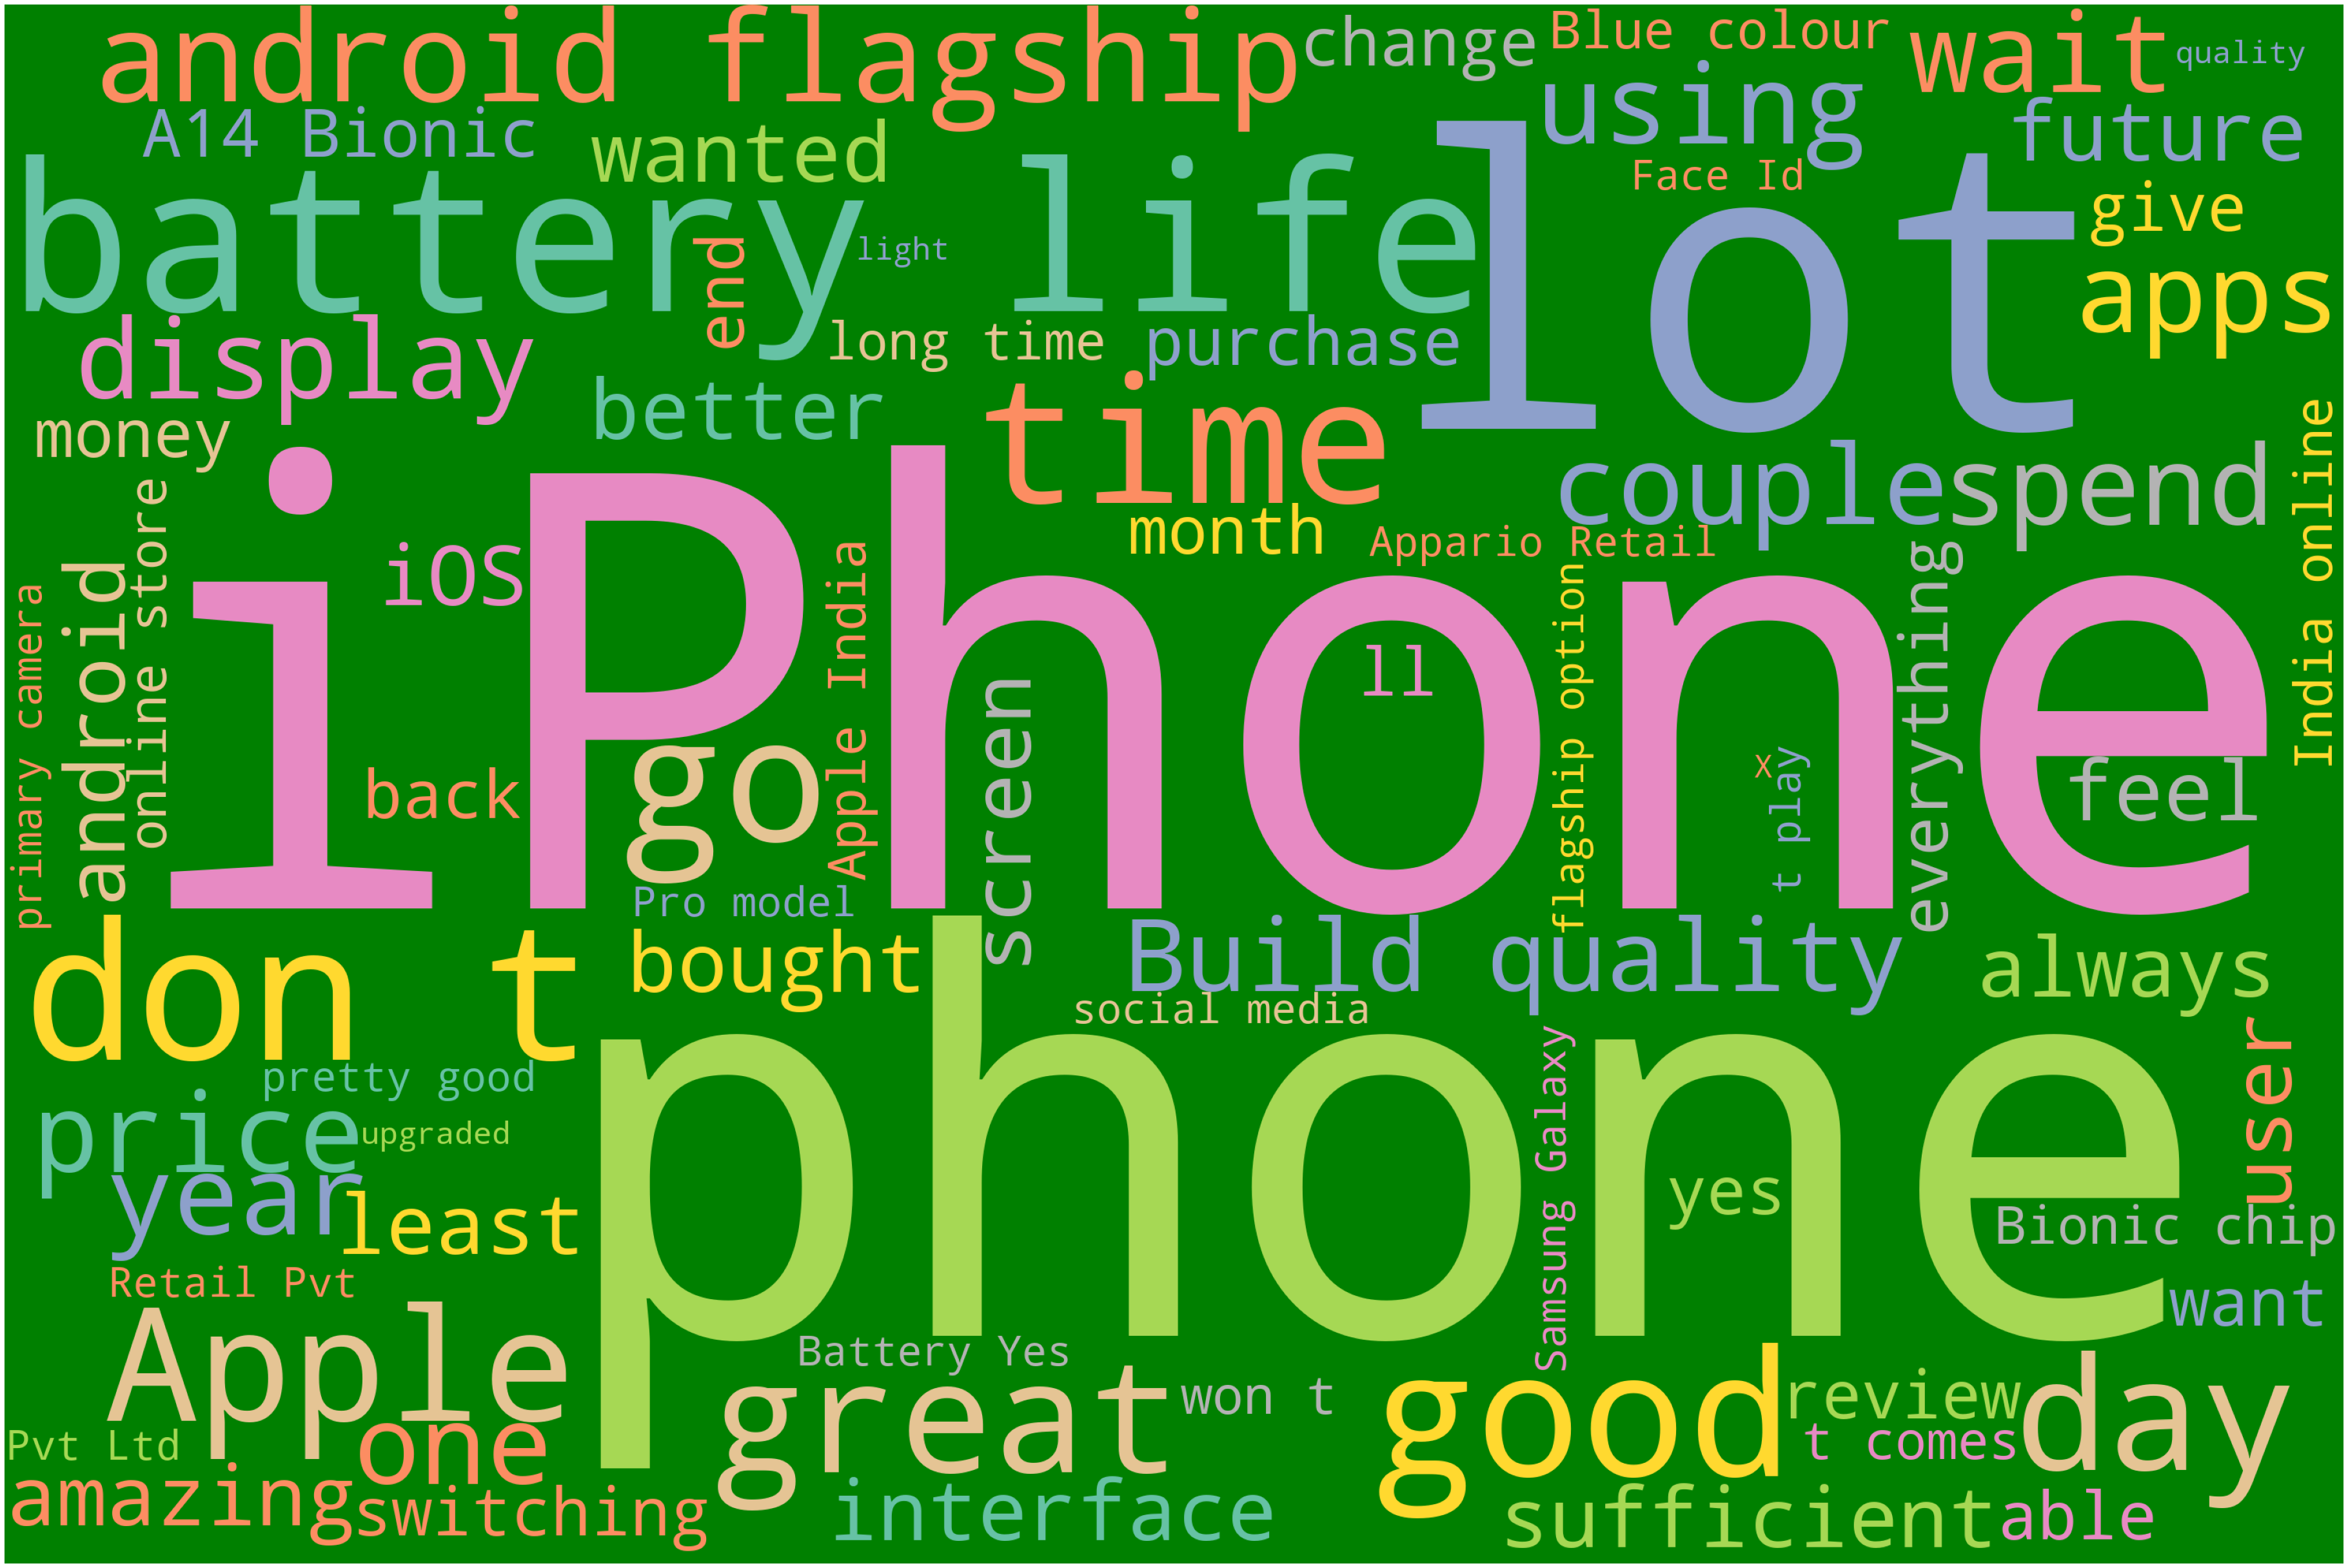

In [25]:
stopwords=STOPWORDS
stopwords.add('will')
stopwords.add("  ")
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'green', max_words=75,
                    colormap='Set2', stopwords=stopwords).generate(text)
plot_cloud(wordcloud)
wordcloud.to_file("wordcloud.png")

# Emotion Mining on Negative Words

In [26]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone12_reviews1))
sentences

['\n\n\n\n\n                    The media could not be loaded.',
 'Another beauty from Apple.',
 'I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth.',
 'Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body.',
 'I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel perfect.',
 'Phone comes with iOS 14.1.',
 'Camera quality was excellent and sufficient  as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter f

In [27]:
with open("negative-words.txt","r") as f: 
    negative=f.read().split("\n")

In [28]:
negative 

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [30]:
negative=negative[55:]

In [34]:
reviews_neg=' '.join([word for word in no_stop_tokens if word in negative])

# Word Cloud For Negative Word

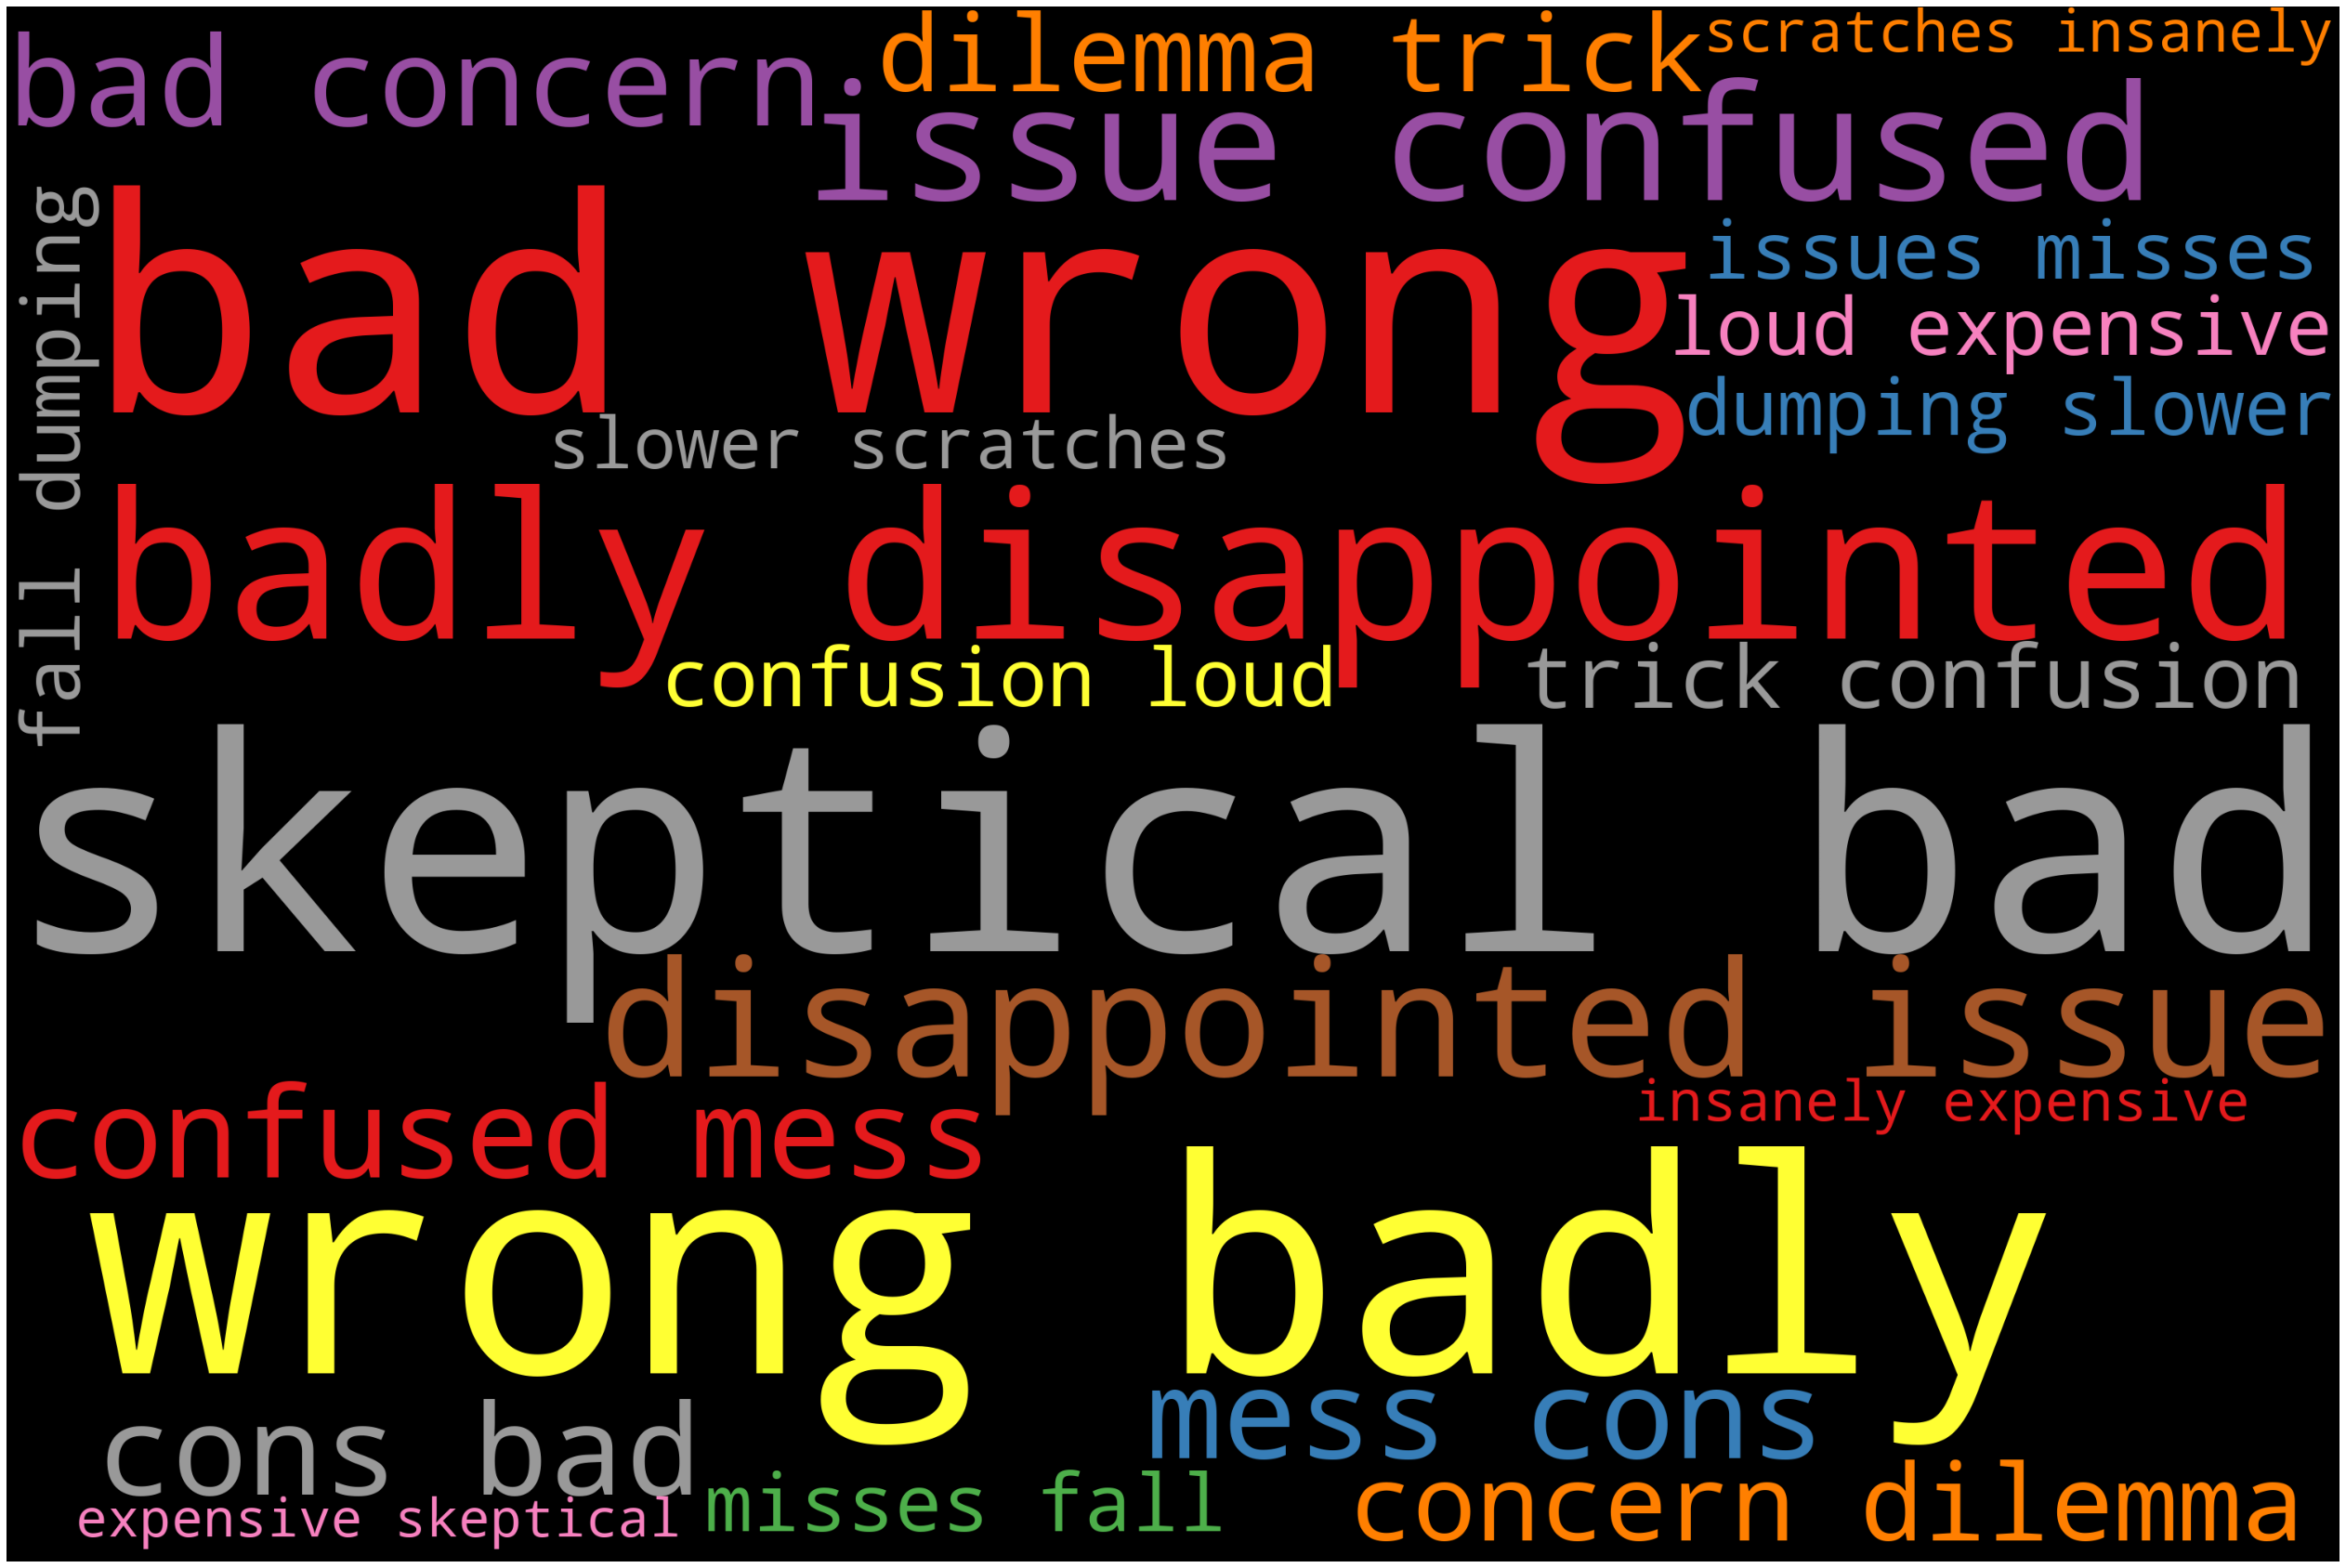

In [38]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(45,35))
    plt.imshow(wordcloud)
    plt.axis('off')
    
    
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=75,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

# Emotion Mining On Positive Word

In [39]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone12_reviews1))
sentences

['\n\n\n\n\n                    The media could not be loaded.',
 'Another beauty from Apple.',
 'I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth.',
 'Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body.',
 'I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour  “ not bad at all and not too flashy”Grip and feel perfect.',
 'Phone comes with iOS 14.1.',
 'Camera quality was excellent and sufficient  as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter f

In [40]:
with open("positive-words.txt","r") as f: 
    positive=f.read().split("\n")

In [41]:
positive

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [42]:
positive=positive[95:]

In [43]:
reviews_pos=' '.join([word for word in no_stop_tokens if word in positive])

# Word Cloud For Positive Words

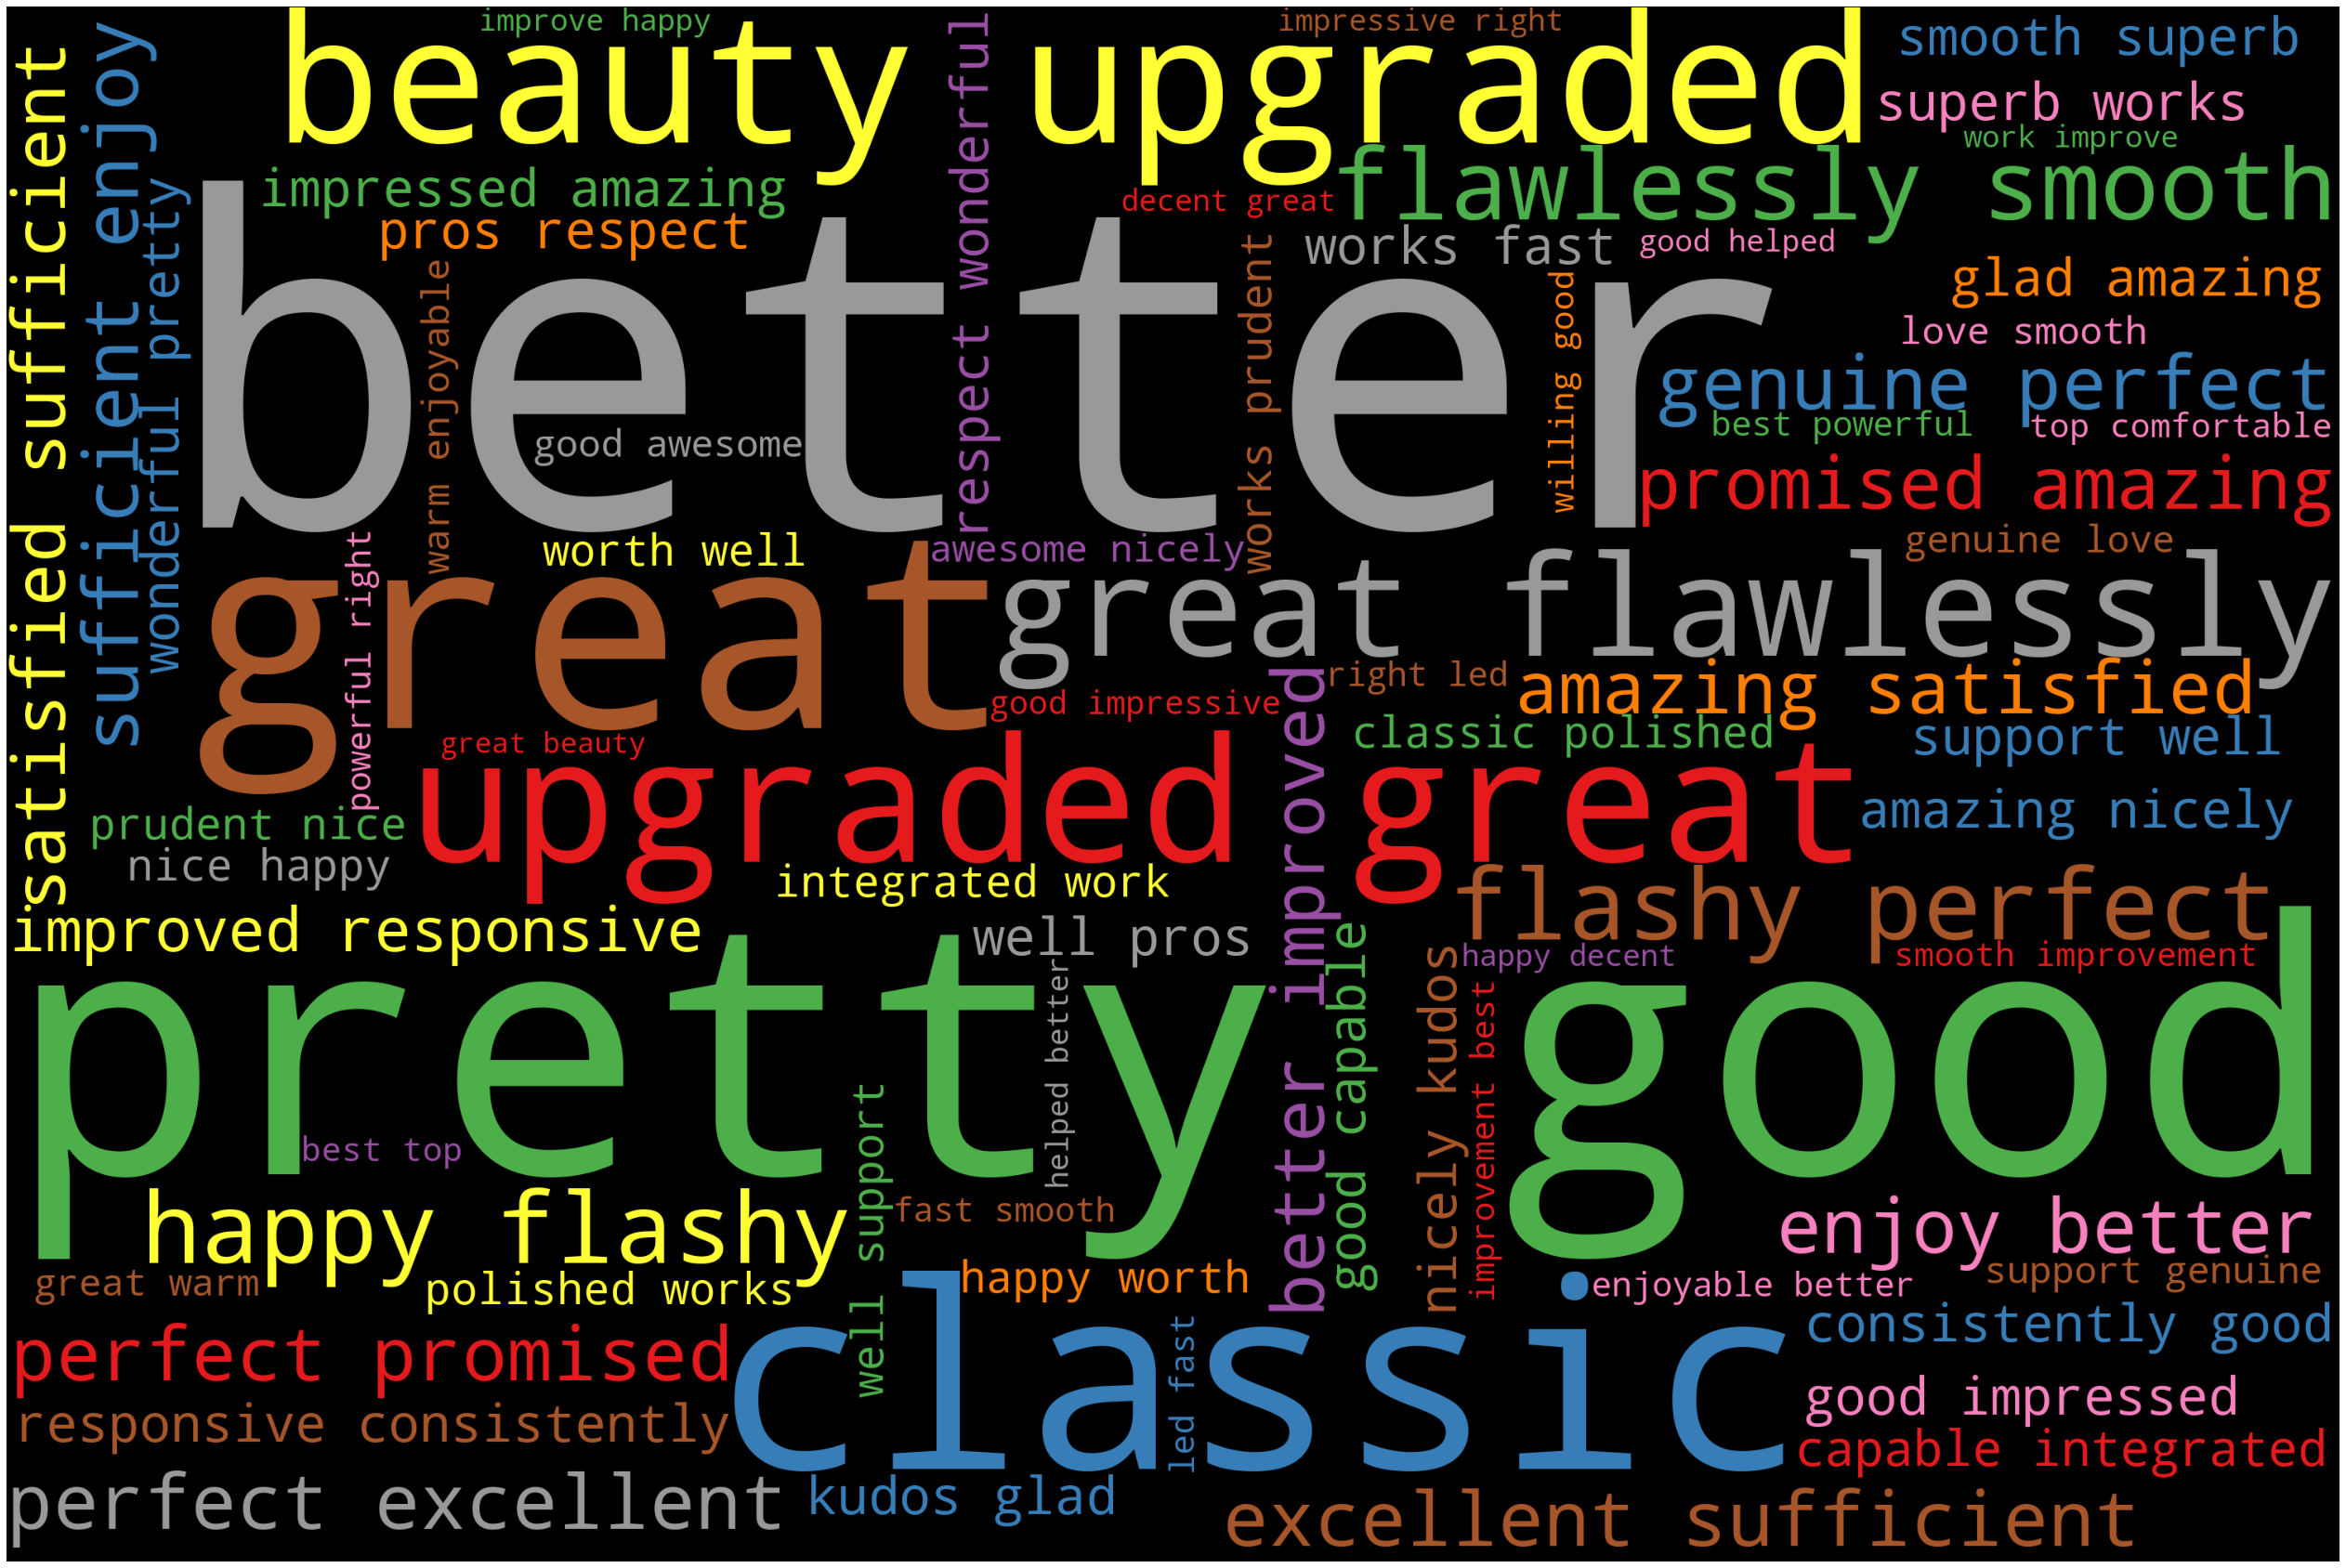

In [44]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(45,35))
    plt.imshow(wordcloud)
    plt.axis('off')
    
    
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=75,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)